<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание по статистическому анализу на python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics
import ssl

Загрузить датасет по url:


In [2]:
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
# все данные загружаются с сервера
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

Более подробно о датасете можно прочитать по [данной ссылке](https://data.world/promptcloud/world-happiness-report-2019) или по [ссылке в kaggle](https://www.kaggle.com/PromptCloudHQ/world-happiness-report-2019)

Context

The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. This year’s World Happiness Report focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.



*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [3]:
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

===============================================================================================================================

Не поняла, что значит частотный график для двух параметров, это нужно было как-то на одном графике изобразить?
То, что получилось, похоже на равномерное распределение.

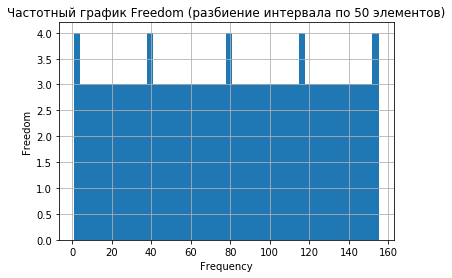

In [10]:
#Частотный график Freedom
plt.hist(df['Freedom'], 50)
plt.xlabel('Frequency')
plt.ylabel('Freedom')
plt.title('Частотный график Freedom (разбиение интервала по 50 элементов)')
plt.grid(True)
plt.show()

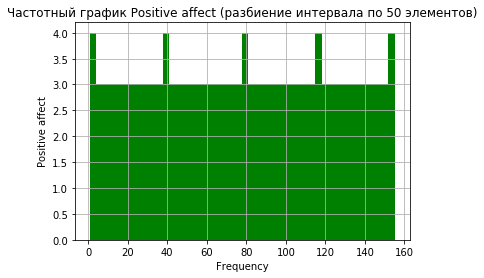

In [17]:
#Частотный график Positive affect
plt.hist(df['Positive affect'], 50, facecolor='g')
plt.xlabel('Frequency')
plt.ylabel('Positive affect')
plt.title('Частотный график Positive affect (разбиение интервала по 50 элементов)')
plt.grid(True)
plt.show()

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [74]:
print('Медиана: ', statistics.median(df['Freedom']))
#print('Значение моды: ', statistics.mode(df['Freedom']))
print('Математическое ожидание: ', statistics.mean(df['Freedom']))
print('Cтандартное отклонение: ', statistics.pstdev(df['Freedom']))
print('Дисперсия: ',statistics.pvariance(df['Freedom']))
print('min: ', min(df['Freedom']))
print('max: ', max(df['Freedom']))
print('Размах: ', (max(df['Freedom']) - min(df['Freedom'])))
#Выбросы
print('Кол-во пустых ячеек:', df['Freedom'].isnull().sum())

Медиана:  71.0
Математическое ожидание:  nan
Cтандартное отклонение:  nan
Дисперсия:  nan
min:  1.0
max:  155.0
Размах:  154.0
Кол-во пустых ячеек: 1


In [75]:
#создаем новый датафрейм без пустых значений в столбце и пересчитываем показатели
df_not_nan = df[~(df['Freedom'].isnull()) & ~(df['Positive affect'].isnull())]

In [76]:
print('Математическое ожидание: ', statistics.mean(df_not_nan['Freedom']))
print('Cтандартное отклонение: ', statistics.pstdev(df_not_nan['Freedom']))
print('Дисперсия: ',statistics.pvariance(df_not_nan['Freedom']))

Математическое ожидание:  78.0
Cтандартное отклонение:  44.74371464239419
Дисперсия:  2002.0


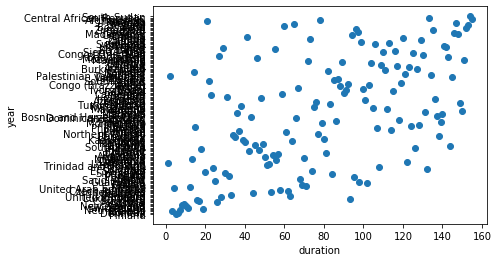

In [28]:
#точечный график для визуальной проверки выбросов
plt.scatter(df['Freedom'], df['Country (region)'])
plt.xlabel('Freedom')
plt.ylabel('Country (region)')

Почему нельзя найти моду?

====================================================================================================================================
Моды нет, найдено 156 одинаково распространенных значений

Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

Коэффициент корреляции Пирсона: 0.6817698430601656


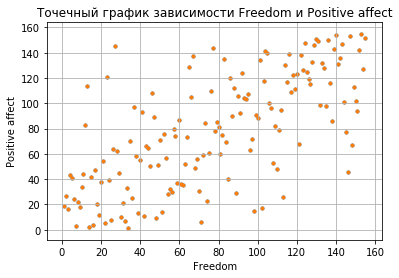

In [77]:
Freedom = df_not_nan['Freedom']
Positive_affect = df_not_nan['Positive affect']
plt.xlabel('Freedom')
plt.ylabel('Positive affect')
plt.title('Точечный график зависимости Freedom и Positive affect')
plt.grid(True)
plt.scatter(Freedom, Positive_affect, marker='.')

###
from scipy.stats import pearsonr
x = df_not_nan['Freedom']
y = df_not_nan['Positive affect']

corr, p_value = pearsonr(x, y)
plt.scatter(x, y, marker='.')
print('Коэффициент корреляции Пирсона:', corr)

=============================================================================================================================
Корреляция между Freedom и positive affect есть, коэффициент корреляции положительный, значит при росте одного показателя увеличивается и другой.

Нормализовать данные колонки Freedom (централизация + масштабирование)

In [79]:
Freedom = df_not_nan['Freedom']
print(statistics.mean(Freedom))

78.0


In [80]:
Freedom_1 = Freedom - statistics.mean(Freedom)
print(statistics.mean(Freedom_1))

0.0


In [81]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

Freedom_2 = min_max_scaler.fit_transform(np.array(Freedom_1).reshape(-1, 1))
print(min(Freedom_2))
print(max(Freedom_2))

[-1.]
[1.]


Построить матрицу корреляций для всех колонок таблицы

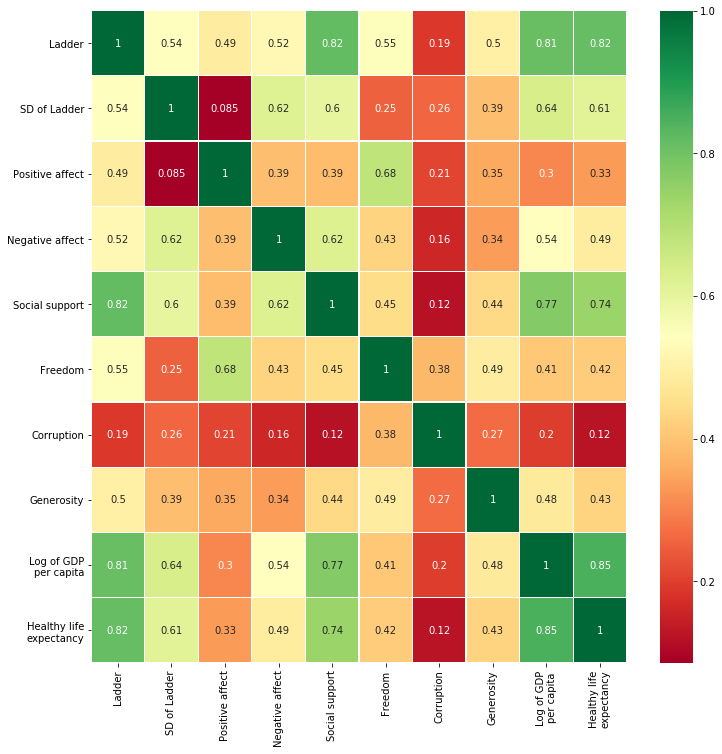

In [82]:
import seaborn as sns
sns.heatmap(df_not_nan.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->матрица корреляций
# gcf() - получение текущей фигуры
fig=plt.gcf()
# set_size_inches() - установить размер фигуры
fig.set_size_inches(12,12)
plt.show()

Загрузить таблицу цен на авокадо: 

In [83]:
import io
import requests
url="http://yustiks.ru/avocado.csv"
df=pd.read_csv(url)
df[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?

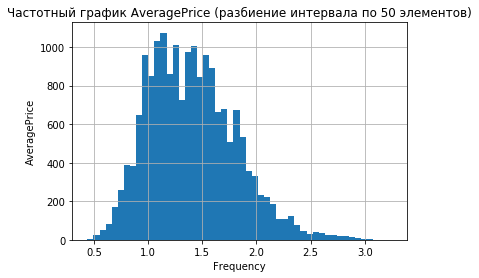

In [84]:
plt.hist(df['AveragePrice'], 50)
plt.xlabel('Frequency')
plt.ylabel('AveragePrice')
plt.title('Частотный график AveragePrice (разбиение интервала по 50 элементов)')
plt.grid(True)
plt.show()

========================================================================================================================
На графике нормальное распределение

Найти корреляцию в следующих колонках:

колонкой 4046, 4225, 4770 и Average Price. Если корелляция есть (обратная или прямая), то какие выводы можно сделать?

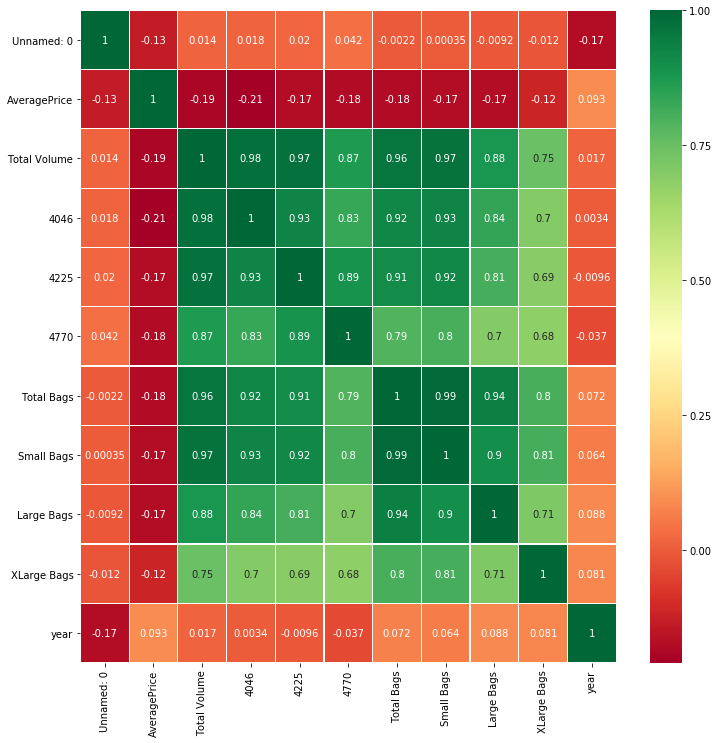

In [85]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->матрица корреляций
# gcf() - получение текущей фигуры
fig=plt.gcf()
# set_size_inches() - установить размер фигуры
fig.set_size_inches(12,12)
plt.show()

На основании матрицы корреляций видим, что корреляция обратная, но коэффициенты невелики, поэтому при росте средней цены на авокадо будут незначительно снижаться показатели в колонках 4046, 4225, 4770, и наоборот.